In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
sns.set()

In [6]:
raw_data=pd.read_csv("Iris.csv")

In [7]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
raw_data["Id"].isnull().sum()

0

In [8]:
raw_data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
data=raw_data.copy()

In [11]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
data=data.drop("Id",axis=1)


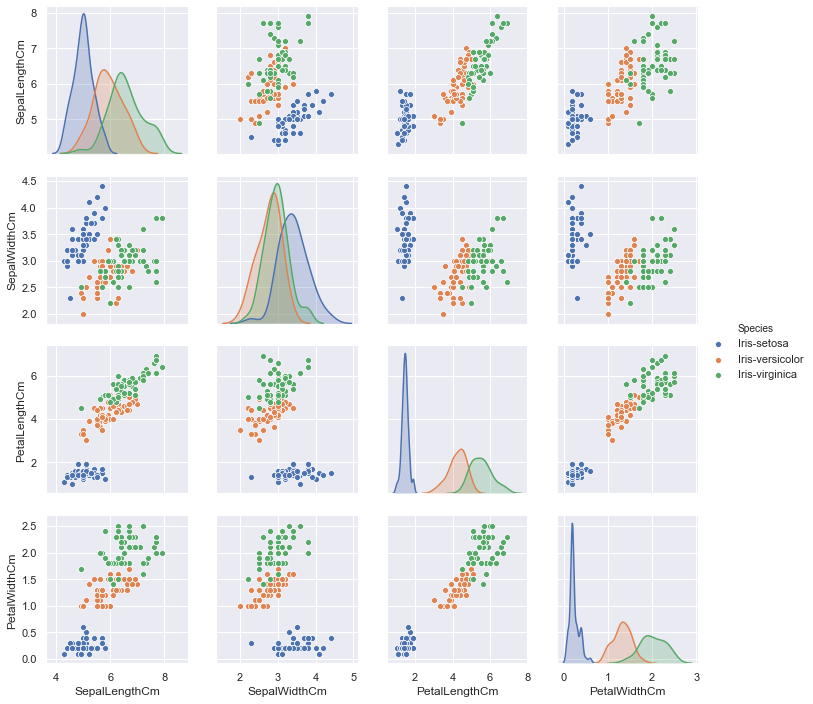

In [18]:
sns.pairplot(data,hue="Species")

## Explaintaion
* From an Exploratory data Analysis point of view, we can see that, the species " IRIS- SETOSA" is fairly separated and distinct with respect to the other species.
* Coming to the other species,"IRIS -VERSICOLOR and IRIS- VIRGINICA" we can see that, the attributes overlap, roughly about 20 to 30 % of the samples, hence a very good optimized model is required to classify these Classes.

### Let us visualise the length of every attribute for each species in a box plot to understand the features better.

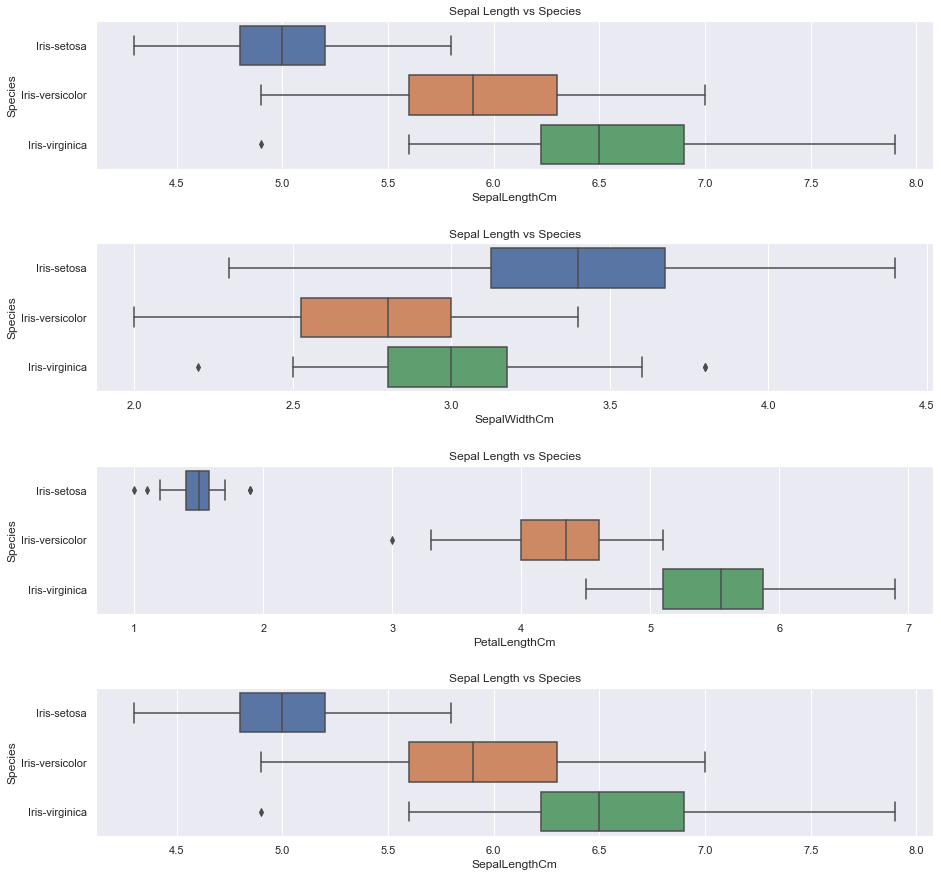

In [37]:
fig,axs = plt.subplots(4,1,figsize = (15,15))
sns.boxplot(x="SepalLengthCm",y="Species",data=data,ax=axs[0]).set_title("Sepal Length vs Species")
sns.boxplot(x="SepalWidthCm",y="Species",data=data,ax=axs[1]).set_title("Sepal Length vs Species")
sns.boxplot(x="PetalLengthCm",y="Species",data=data,ax=axs[2]).set_title("Sepal Length vs Species")
sns.boxplot(x="SepalLengthCm",y="Species",data=data,ax=axs[3]).set_title("Sepal Length vs Species")
plt.subplots_adjust(hspace=0.5)

### Explaination
* From the above figures we can see that, eventhough there are some outliers present in every feature for all the different species, the number of outliers are very less and hence we can go ahead with fitting classification models to predict the classes

### Splitting the dataSet

In [182]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [67]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
X = data.drop("Species",axis = 1)

In [70]:
y = data["Species"]

In [235]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 5)

### KNN classifier

In [163]:
k_range = list(range(1,15))

In [176]:
scores= []

In [192]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    cv= cross_val_score(knn,X,y,cv = 10,scoring = "accuracy")
    scores.append(cv.mean()*100)
    print("K is equal to = ", k , " With accuracy score of ", cv.mean())
optimum_k = k_range[scores.index(max(scores))]
print("Optimal number of k-neighbours is ",optimum_k)

K is equal to =  1  With accuracy score of  0.96
K is equal to =  2  With accuracy score of  0.9533333333333334
K is equal to =  3  With accuracy score of  0.9666666666666666
K is equal to =  4  With accuracy score of  0.9666666666666666
K is equal to =  5  With accuracy score of  0.9666666666666668
K is equal to =  6  With accuracy score of  0.9666666666666668
K is equal to =  7  With accuracy score of  0.9666666666666668
K is equal to =  8  With accuracy score of  0.9666666666666668
K is equal to =  9  With accuracy score of  0.9733333333333334
K is equal to =  10  With accuracy score of  0.9666666666666668
K is equal to =  11  With accuracy score of  0.9666666666666668
K is equal to =  12  With accuracy score of  0.9733333333333334
K is equal to =  13  With accuracy score of  0.9800000000000001
K is equal to =  14  With accuracy score of  0.9733333333333334
Optimal number of k-neighbours is  13


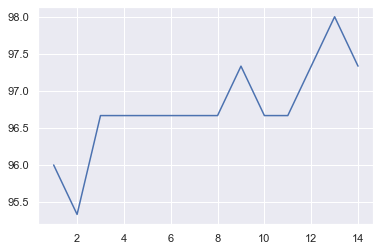

In [178]:
plt.plot(k_range,scores)
plt.show()

In [199]:
# Let us try fitting the model with k = 13
knn = KNeighborsClassifier(n_neighbors= 13,metric = 'euclidean')
knn.fit(X_train,y_train)
y_pred_k = knn.predict(X_test)
accuracy_k = metrics.accuracy_score(y_test,y_pred)
print(accuracy_k)

0.9666666666666667


In [200]:
# Let us fit a Logistic Regression Model as well and see how it performs
logreg = LogisticRegression()
cv_log = cross_val_score(logreg,X,y,cv=10,scoring= 'accuracy')
print("Cross Validataion Mean accuracy is equal to= ",cv_log.mean())
logreg.fit(X_train,y_train)
y_pred_l = logreg.predict(X_test)
accuracy_l=metrics.accuracy_score(y_test, y_pred)

Cross Validataion Mean accuracy is equal to=  0.9533333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [242]:
y_test = y_test.reset_index(drop=True)
result= pd.DataFrame(y_test)

In [267]:
result["Predicted_Logistic Regression"] = y_pred_l
result["Predicted_KnN Classifier"] = y_pred_k
result= result.iloc[:,0:4]

In [268]:
result

,Species,Actual,Predicted_Logistic Regression,Predicted_KnN Classifier
0,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
1,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor,Iris-virginica,Iris-versicolor
